In [2]:
import numpy as np
import pandas as pd
import datetime #时间运算库
import pickle
import os

import matplotlib
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (7.0, 4.0) # 显示大小

import plotly.offline as pltly_off
import plotly.graph_objs as pltly_go

# myfont = matplotlib.font_manager.FontProperties(fname='./figs/YaHeiMonacoHybrid.ttf')  
pylab.rcParams['font.sans-serif'] = ['SimHei']  # 中文字体设置
pylab.rcParams['axes.unicode_minus'] = False

# from matplotlib.font_manager import _rebuild

# _rebuild() 

In [33]:
# #转换数据类型
# def float2int(x):
#     try:
#         x = int(x)
#     except Exception as err:
#             x = int(-1)
#     return x

# def convert_variable_type(df_user, df_product, df_comment, df_action):
#     df_user_tmp = df_user.copy()
#     df_product_tmp = df_product.copy()
#     df_comment_tmp = df_comment.copy()
#     df_action_tmp = df_action.copy()
    
#     print("before convert: ", df_user_tmp.dtypes)
#     df_user_tmp.loc[:, "age"] = df_user_tmp.loc[:, "age"].apply(float2int)
#     df_user_tmp.loc[:, "sex"] = df_user_tmp.loc[:, "sex"].apply(float2int)
#     print("after convert: ", df_user_tmp.dtypes)
    
#     print("before convert: ", df_product_tmp.dtypes) #不需要转数据类型
    
#     print("before convert: ", df_comment_tmp.dtypes)
#     df_comment_tmp.loc[:, "dt"] = df_comment_tmp.loc[:, "dt"] \
#         .apply(lambda x : datetime.datetime.strptime(str(x), "%Y-%m-%d"))
#     print("after convert: ", df_comment_tmp.dtypes)
    
#     print("before convert: ", df_action_tmp.dtypes)  #不需要转数据类型
#     df_action_tmp.loc[:, "time"] = df_action_tmp.loc[:, "time"] \
#         .apply(lambda x : datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S"))
#     print("after convert: ", df_action_tmp.dtypes)
    
#     return df_user_tmp, df_product_tmp, df_comment_tmp, df_action_tmp

In [3]:
############读取所有的文件#########################
def read_files():
    
    if not os.path.exists("data.pkl"):#os即operating system（操作系统），os.path模块主要用于文件的属性获取
        #用户表
        df_user = pd.read_csv("JData_User.csv")#读取csv文件：pd.read_csv()
        #商品表
        df_product = pd.read_csv("JData_Product.csv")
        #评论表
        df_comment = pd.read_csv("JData_Comment.csv")
        #行为表
        df_action_1 = pd.read_csv("JData_Action_201602.csv")
        df_action_2 = pd.read_csv("JData_Action_201603.csv")
        df_action_3 = pd.read_csv("JData_Action_201604.csv")
        df_action = pd.concat([df_action_1, df_action_2, df_action_3], axis=0)
        
        df_user, _, _, df_action = convert_variable_type(df_user, pd.DataFrame(), pd.DataFrame(), df_action)#DataFrame分布式数据集
        #convert_variable_type转换变量类型
        
        #以下是读写操作
        with open("data.pkl", "wb") as f: # wb:以二进制格式打开一个文件只用于写入。如果该文件已存在则将其覆盖。如果该文件不存在，创建新文件。
            pickle.dump((df_user, df_product, df_comment, df_action), f)     # pickle.dump(obj, file[, protocol]）序列化对象
        
    else:
        with open("data.pkl", "rb") as f:
            df_user, df_product, df_comment, df_action = pickle.load(f) #反序列化对象   ？？？
#             加载存储到磁盘的序列化对象到内存中，也就是读取pkl文件
#             因为我存储的是一个tuple（元祖），所以左边可以用逗号隔开，表示tuple对应位置的元素，类似于：
#             tup = tuple(tp0, tp1, tp2)
#             obj1， obj2， obj3 = tup[0], tup[1], tup[2]
        
    return df_user, df_product, df_comment, df_action

df_user, df_product, df_comment, df_action = read_files()   #这个，号是连接

In [35]:
# df_user = pd.read_csv("JData_User.csv")
# df_user.loc[:, "user_reg_tm"] = df_user.loc[:, "user_reg_tm"].apply(lambda x : pd.to_datetime(x))  #1.apply()用一个对象替换另一个对象2.loc:通过行标签索引数据3.lambda函数有输入输出4.pd.to_datetime将该列数据转换为时间类型
# df_user_after_415 = df_user.loc[df_user.loc[:, "user_reg_tm"] > pd.to_datetime("2016-04-15")]
# df_user = df_user.loc[df_user.loc[:, "user_reg_tm"] < pd.to_datetime("2016-04-15")]

In [36]:
# print(df_user.head())
# df_208546_action = df_action.loc[df_action.loc[:, "user_id"] == 208546]
# print(df_208546_action.head())

   user_id  sku_id  type  cate                time
0   266079  138778     1     8 2016-01-31 23:59:02
1   266079  138778     6     8 2016-01-31 23:59:03
2   200719   61226     1     8 2016-01-31 23:59:07
3   200719   61226     6     8 2016-01-31 23:59:08
4   263587   72348     1     5 2016-01-31 23:59:08
      user_id  sku_id  type  cate                time  weekday
351    269365  166345     4     9 2016-02-01 00:01:00        0
649    235443   36692     4     4 2016-02-01 00:02:00        0
980    247689    9112     4     5 2016-02-01 00:03:00        0
1719   273959  102034     4     5 2016-02-01 00:05:00        0
2153   226791  163550     4     4 2016-02-01 00:06:00        0
6162
1844
7759
---------
6946
1996
8869
---------
5001
1800
6262
---------
6409
1805
8078
---------
6049
1855
7505
---------
4174
1643
5143
---------
3710
1578
4636
---------


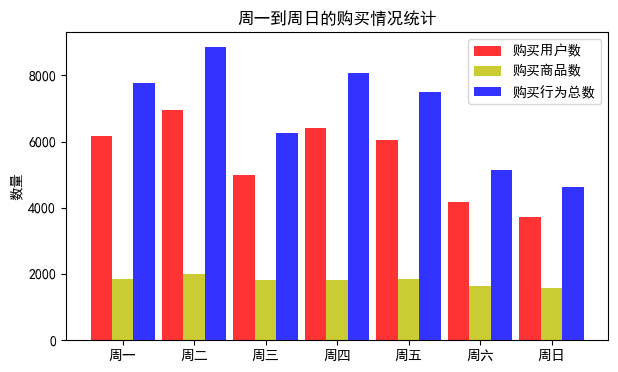

In [5]:
def buy_user_cnt_on_weekdays(df_action):
    df_action_tmp = df_action.loc[:, ["user_id", "sku_id", "type", "cate", "time"]].copy()  #TMP和TEMP文件是各种软件或系统产生的临时文件
    print(df_action_tmp.head())    #第一次打印
    df_action_tmp = df_action_tmp.loc[df_action_tmp.loc[:, "type"] == 4]
    df_action_tmp.loc[:, "weekday"] = df_action_tmp.loc[:, "time"].apply(lambda x : x.weekday())   #第二次打印覆盖
    print(df_action_tmp.head())
    
    weekdays = ["周一", "周二", "周三", "周四", "周五", "周六", "周日"]
    x = np.arange(len(weekdays))
    user_cnt = [] #[]表示list列表数据类型
    sku_cnt = []
    user_sku_cnt = []
    bar_width=0.3
    
    for i in range(7):
        df_user_buy_week = df_action_tmp.loc[df_action_tmp.loc[:, "weekday"] == i]
        groups_by_user_id = df_user_buy_week.groupby("user_id")
        groups_by_sku_id = df_user_buy_week.groupby("sku_id")
        
        user_cnt.append(len(groups_by_user_id)) #在列表末尾加新对象
        sku_cnt.append(len(groups_by_sku_id))
        user_sku_cnt.append(len(df_user_buy_week))
        
        print(len(groups_by_user_id))
        print(len(groups_by_sku_id))
        print(len(df_user_buy_week))
        print("---------")
        
    plt.bar(x=x, height=user_cnt, label="购买用户数", color='r', alpha=0.8, width=bar_width)
    plt.bar(x=x+bar_width, height=sku_cnt, tick_label=weekdays, label="购买商品数", color='y', alpha=0.8, width=bar_width)
    plt.bar(x=x+2*bar_width, height=user_sku_cnt, label="购买行为总数", color='b', alpha=0.8, width=bar_width)
    plt.title("周一到周日的购买情况统计")
    #     plt.xlabel()
    plt.ylabel("数量")
    plt.legend()
    plt.savefig("./figs/buy_user_cnt_on_weekdays.png", dpi=600)
    plt.show()
    
buy_user_cnt_on_weekdays(df_action)

In [6]:
def buy_user_cnt_on_days(df_action, start_time, end_time):
    df_action_tmp = df_action.loc[:, ["user_id", "sku_id", "type", "time"]].copy()
    df_action_tmp = df_action_tmp.loc[(df_action_tmp.loc[:, "time"] >= start_time) \
                                      & (df_action_tmp.loc[:, "time"] <= end_time)]
#     print(df_action_tmp.head())
    df_action_tmp = df_action_tmp.loc[df_action_tmp.loc[:, "type"] == 4]
    df_action_tmp.loc[:, "day"] = df_action_tmp.loc[:, "time"].apply(lambda x : x.day)
#     df_action_tmp= df_action_tmp.reset_index()
#     print(df_action_tmp.head())

    days = np.arange(1, 32)
    x = np.arange(len(days))
    user_cnt = []
    sku_cnt = []
    user_sku_cnt = []
    bar_width=0.3
    
    for i in range(1, 32):
        print(i, " ---------------")
        df_user_buy_day = df_action_tmp.loc[df_action_tmp.loc[:, "day"] == i]
        groups_by_user_id = df_user_buy_day.groupby("user_id")
        groups_by_sku_id = df_user_buy_day.groupby("sku_id")
        
        user_cnt.append(len(groups_by_user_id))
        sku_cnt.append(len(groups_by_sku_id))
        user_sku_cnt.append(len(df_user_buy_day))
        
        print(len(groups_by_user_id))
        print(len(groups_by_sku_id))
        print(len(df_user_buy_day))
        
    plt.bar(x=x, height=user_cnt, label="user_cnt", color='r', alpha=0.8, width=bar_width)
    plt.bar(x=x+bar_width, height=sku_cnt, tick_label=days, label="sku_cnt", color='y', alpha=0.8, width=bar_width)
    plt.bar(x=x+2*bar_width, height=user_sku_cnt, label="buy_cnt", color='b', alpha=0.8, width=bar_width)
    plt.legend()
    plt.show()
        

In [49]:
# buy_user_cnt_on_days(df_action, pd.to_datetime("2016-02-01"), pd.to_datetime("2016-03-01"))

In [50]:
# buy_user_cnt_on_days(df_action, pd.to_datetime("2016-03-01"), pd.to_datetime("2016-04-01"))

In [51]:
# buy_user_cnt_on_days(df_action, pd.to_datetime("2016-04-01"), pd.to_datetime("2016-04-16"))

In [7]:
def buy_cate_cnt_on_weekdays(df_action):
    df_action_tmp = df_action.loc[:, ["user_id", "sku_id", "type", "cate", "time"]].copy()
#     print(df_action_tmp.head())
    df_action_tmp = df_action_tmp.loc[df_action_tmp.loc[:, "type"] == 4]
    df_action_tmp.loc[:, "weekday"] = df_action_tmp.loc[:, "time"].apply(lambda x : x.weekday())
#     print(df_action_tmp.head())

    weekdays = ["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"]
    x = np.arange(len(weekdays))
    cate4_list = []
    cate5_list = []
    cate6_list = []
    cate7_list = []
    cate8_list = []
    cate9_list = []
    cate10_list = []
    cate11_list = []
    bar_width=0.1

    for i in range(7):
        df_user_buy_week = df_action_tmp.loc[df_action_tmp.loc[:, "weekday"] == i]
        df_by_cate = df_user_buy_week.groupby("cate").count()
#         print(df_by_cate)
        cate4_cnt = df_by_cate.loc[4, "time"]
        cate5_cnt = df_by_cate.loc[5, "time"]
        cate6_cnt = df_by_cate.loc[6, "time"]
        cate7_cnt = df_by_cate.loc[7, "time"]
        cate8_cnt = df_by_cate.loc[8, "time"]
        cate9_cnt = df_by_cate.loc[9, "time"]
        cate10_cnt = df_by_cate.loc[10, "time"]
        cate11_cnt = 0 if 11 not in df_by_cate.index else df_by_cate.loc[11, "time"]
        
        cate4_list.append(cate4_cnt)
        cate5_list.append(cate5_cnt)
        cate6_list.append(cate6_cnt)
        cate7_list.append(cate7_cnt)
        cate8_list.append(cate8_cnt)
        cate9_list.append(cate9_cnt)
        cate10_list.append(cate10_cnt)
        cate11_list.append(cate11_cnt)
        
        
        print("cate4_cnt", cate4_cnt)
        print("cate5_cnt", cate5_cnt)
        print("cate6_cnt", cate6_cnt)
        print("cate7_cnt", cate7_cnt)
        print("cate8_cnt", cate8_cnt)
        print("cate9_cnt", cate9_cnt)
        print("cate10_cnt", cate10_cnt)
        print("cate11_cnt", cate11_cnt)
        print("---------")
#         print(list_user_buy_cnt_week[i])

    plt.bar(x=x, height=cate4_list, label="cate4_cnt", color='r', alpha=0.8, width=bar_width)
    plt.bar(x=x+bar_width, height=cate5_list, label="cate5_cnt", color='y', alpha=0.8, width=bar_width)
    plt.bar(x=x+2*bar_width, height=cate6_list, label="cate6_cnt", color='b', alpha=0.8, width=bar_width)
    plt.bar(x=x+3*bar_width, height=cate7_list, label="cate7_cnt", color='g', alpha=0.8, width=bar_width)
    plt.bar(x=x+4*bar_width, height=cate8_list, tick_label=weekdays, label="cate8_cnt", color='k', alpha=0.8, width=bar_width)
    plt.bar(x=x+5*bar_width, height=cate9_list, label="cate9_cnt", color='c', alpha=0.8, width=bar_width)
    plt.bar(x=x+6*bar_width, height=cate10_list, label="cate10_cnt", color='m', alpha=0.8, width=bar_width)
    plt.bar(x=x+7*bar_width, height=cate11_list, label="cate11_cnt", color=(0.1, 0.2, 0.5), alpha=0.8, width=bar_width)
    plt.legend()
    plt.savefig("./figs/test.png")
    plt.show()
    
# buy_cate_cnt_on_weekdays(df_action)

In [8]:
pylab.rcParams['figure.figsize'] = (20.0, 8.0) # 显示大小

def buy_cate_cnt_on_days(df_action, start_time, end_time):
    df_action_tmp = df_action.loc[:, ["user_id", "sku_id", "type", "cate", "time"]].copy()
    df_action_tmp = df_action_tmp.loc[(df_action_tmp.loc[:, "time"] >= start_time) \
                                      & (df_action_tmp.loc[:, "time"] <= end_time)]
#     print(df_action_tmp.head())
    df_action_tmp = df_action_tmp.loc[df_action_tmp.loc[:, "type"] == 4]
    df_action_tmp.loc[:, "day"] = df_action_tmp.loc[:, "time"].apply(lambda x : x.day)
    
    days = np.arange(1,31)
    x = np.arange(len(days))
    cate4_list = []
    cate5_list = []
    cate6_list = []
    cate7_list = []
    cate8_list = []
    cate9_list = []
    cate10_list = []
    cate11_list = []
    bar_width=0.1
    
    for i in range(1, 31):
        print(i, " ---------------")
        df_user_buy_week = df_action_tmp.loc[df_action_tmp.loc[:, "day"] == i]
        df_by_cate = df_user_buy_week.groupby("cate").count()
#         print(df_by_cate.T.head())
        
        cate4_cnt = 0 if 4 not in df_by_cate.index else df_by_cate.loc[4, "time"]
        cate5_cnt = 0 if 5 not in df_by_cate.index else df_by_cate.loc[5, "time"]
        cate6_cnt = 0 if 6 not in df_by_cate.index else df_by_cate.loc[6, "time"]
        cate7_cnt = 0 if 7 not in df_by_cate.index else df_by_cate.loc[7, "time"]
        cate8_cnt = 0 if 8 not in df_by_cate.index else df_by_cate.loc[8, "time"]
        cate9_cnt = 0 if 9 not in df_by_cate.index else df_by_cate.loc[9, "time"]
        cate10_cnt = 0 if 10 not in df_by_cate.index else df_by_cate.loc[10, "time"]
        cate11_cnt = 0 if 11 not in df_by_cate.index else df_by_cate.loc[11, "time"]
        
        cate4_list.append(cate4_cnt)
        cate5_list.append(cate5_cnt)
        cate6_list.append(cate6_cnt)
        cate7_list.append(cate7_cnt)
        cate8_list.append(cate8_cnt)
        cate9_list.append(cate9_cnt)
        cate10_list.append(cate10_cnt)
        cate11_list.append(cate11_cnt)
        
        print("cate4_cnt", cate4_cnt)
        print("cate5_cnt", cate5_cnt)
        print("cate6_cnt", cate6_cnt)
        print("cate7_cnt", cate7_cnt)
        print("cate8_cnt", cate8_cnt)
        print("cate9_cnt", cate9_cnt)
        print("cate10_cnt", cate10_cnt)
        print("cate11_cnt", cate11_cnt)
    
    plt.bar(x=x, height=cate4_list, label="cate4_cnt", color='r', alpha=0.8, width=bar_width)
    plt.bar(x=x+bar_width, height=cate5_list, label="cate5_cnt", color='y', alpha=0.8, width=bar_width)
    plt.bar(x=x+2*bar_width, height=cate6_list, label="cate6_cnt", color='b', alpha=0.8, width=bar_width)
    plt.bar(x=x+3*bar_width, height=cate7_list, label="cate7_cnt", color='g', alpha=0.8, width=bar_width)
    plt.bar(x=x+4*bar_width, height=cate8_list, tick_label=days, label="cate8_cnt", color='k', alpha=0.8, width=bar_width)
    plt.bar(x=x+5*bar_width, height=cate9_list, label="cate9_cnt", color='c', alpha=0.8, width=bar_width)
    plt.bar(x=x+6*bar_width, height=cate10_list, label="cate10_cnt", color='m', alpha=0.8, width=bar_width)
    plt.bar(x=x+7*bar_width, height=cate11_list, label="cate11_cnt", color=(0.1, 0.2, 0.5), alpha=0.8, width=bar_width)
    plt.legend()
    plt.show()
    

In [53]:
# buy_cate_cnt_on_days(df_action, pd.to_datetime("2016-03-01"), pd.to_datetime("2016-04-01"))

In [54]:
# buy_cate_cnt_on_days(df_action, pd.to_datetime("2016-02-01"), pd.to_datetime("2016-03-01"))

In [55]:
# buy_cate_cnt_on_days(df_action, pd.to_datetime("2016-04-01"), pd.to_datetime("2016-04-16"))

In [ ]:
#################### 以下参考论文中的数据分析 ####################

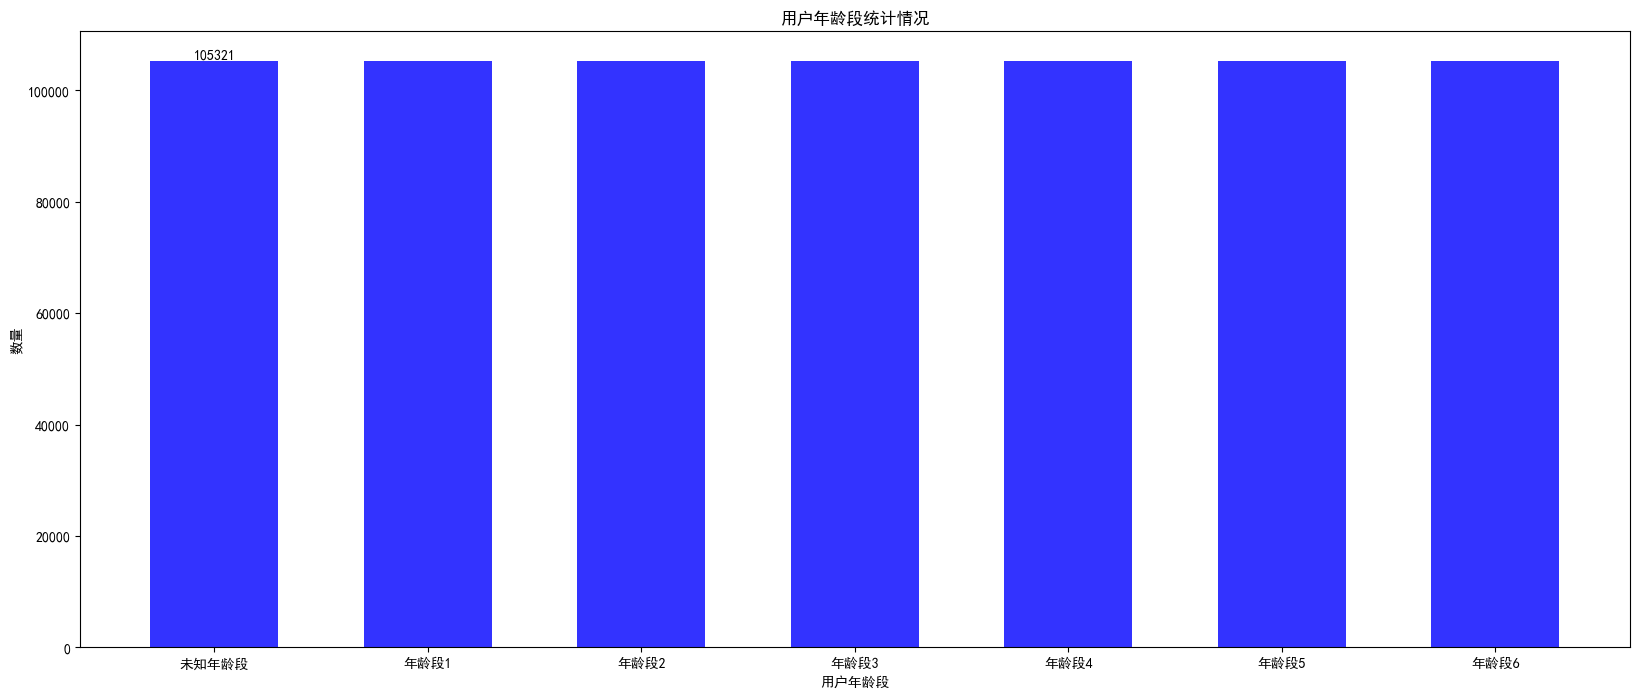

,age,cnt
0,-1,105321


In [9]:
# 用户年龄分布情况
def get_user_age_cnt(df_user):
    df_user_age = df_user.loc[:, ["user_id", "age"]]
    df_user_age.rename(columns={"user_id":"cnt"}, inplace=True)
    df_user_age = df_user_age.groupby("age").count().reset_index()
    
    x = ["未知年龄段", "年龄段1", "年龄段2", "年龄段3", "年龄段4", "年龄段5", "年龄段6"]
    y = df_user_age.loc[:, "cnt"].values.tolist()
    plt.bar(x=x, height=y, label="", color='b', alpha=0.8, width=0.6)
    for a,b in zip(x,y):
        plt.text(a,b+0.5,'%.0f'%b,ha = 'center',va = 'bottom')
    plt.title("用户年龄段统计情况")
    plt.xlabel("用户年龄段")
    plt.ylabel("数量")
#     plt.legend()
    plt.savefig("./figs/user_age_cnt.png", dpi=600)
    plt.show()
    
    
    return df_user_age

get_user_age_cnt(df_user)

In [10]:
# 用户性别分布情况
def get_user_sex_cnt(df_user):
    df_user_sex = df_user.loc[:, ["user_id", "sex"]]
    df_user_sex.rename(columns={"user_id":"cnt"}, inplace=True)
    df_user_sex = df_user_sex.groupby("sex").count().reset_index()
    
    x = df_user_sex.loc[:, "sex"].values.tolist()
    y = df_user_sex.loc[:, "cnt"].values.tolist()
    plt.bar(x=x, height=y, label="", color='b', alpha=0.8, width=0.3)
    for a,b in zip(x,y):
        plt.text(a,b+0.5,'%.0f'%b,ha = 'center',va = 'bottom',fontsize=14)
    plt.title("用户性别统计情况")
    plt.xlabel("用户性别")
    plt.ylabel("数量")
#     plt.legend()
    plt.savefig("./figs/user_sex_cnt.png", dpi=600)
    plt.show()
    
    return df_user_sex

# get_user_sex_cnt(df_user)

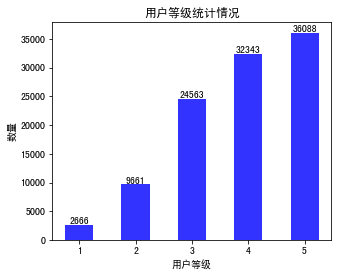

,user_lv_cd,cnt
0,1,2666
1,2,9661
2,3,24563
3,4,32343
4,5,36088


In [48]:
pylab.rcParams['figure.figsize'] = (5.0, 4.0) # 显示大小
# 用户等级分布情况
def get_user_lv_cnt(df_user):
    df_user_lv = df_user.loc[:, ["user_id", "user_lv_cd"]]
    df_user_lv.rename(columns={"user_id":"cnt"}, inplace=True)
    df_user_lv = df_user_lv.groupby("user_lv_cd").count().reset_index()
    
    x = df_user_lv.loc[:, "user_lv_cd"].values.tolist()
    y = df_user_lv.loc[:, "cnt"].values.tolist()
    plt.bar(x=x, height=y, label="", color='b', alpha=0.8, width=0.5)
    for a,b in zip(x,y):
        plt.text(a,b+0.5,'%.0f'%b,ha = 'center',va = 'bottom')
    plt.title("用户等级统计情况")
    plt.xlabel("用户等级")
    plt.ylabel("数量")
#     plt.legend()
    plt.savefig("./figs/user_lv_cnt.png", dpi=600)
    plt.show()
    
    return df_user_lv

get_user_lv_cnt(df_user)

In [11]:
df_user.values.tolist()[0:10]

[[200001, -1, -1, 5, Timestamp('2016-01-26 00:00:00')],
 [200002, -1, 0, 1, Timestamp('2016-01-26 00:00:00')],
 [200003, -1, 1, 4, Timestamp('2016-01-26 00:00:00')],
 [200004, -1, -1, 1, Timestamp('2016-01-26 00:00:00')],
 [200005, -1, 0, 4, Timestamp('2016-01-26 00:00:00')],
 [200006, -1, -1, 2, Timestamp('2013-04-10 00:00:00')],
 [200007, -1, -1, 3, Timestamp('2016-01-26 00:00:00')],
 [200008, -1, -1, 3, Timestamp('2016-01-26 00:00:00')],
 [200009, -1, -1, 2, Timestamp('2016-01-26 00:00:00')],
 [200010, -1, -1, 3, Timestamp('2016-01-26 00:00:00')]]

In [13]:
# 用户发生购买操作前一天内行为统计
def get_action_cnt_before_buy(df_action):
    global df_action_cnt
    df_buy_time = df_action.loc[df_action.loc[:, "type"] == 4]
    df_buy_time = df_buy_time.loc[:, ["user_id", "sku_id", "time"]]
    df_action_cnt = df_action.loc[:, ["user_id", "sku_id", "time", "type"]]
    
    i=0
    groups = df_action_cnt.groupby(["user_id", "sku_id"])
    print(type(groups))
    df_useful = pd.DataFrame()
    for value in df_buy_time.values.tolist():
        if i%1000 == 0:
            print(i)
        i += 1
        user_id = value[0]
        sku_id = value[1]
        end_time = value[2]
        start_time = end_time - datetime.timedelta(days=20)
        
        df = groups.get_group((user_id, sku_id))
        df = df.loc[(df.loc[:, "time"] > start_time) & (df.loc[:, "time"] < end_time)]
        df_useful = df.append(df_useful)
    
    print(df_useful.groupby("type").count())
    
    
    return df_useful.head(10)

# get_action_cnt_before_buy(df_action)

[607437, 159700, 77745, 102445, 89013]
[60219, 7511, 3477, 4676, 4111]
[6152, 932, 527, 697, 684]
[3837, 2032, 1173, 1424, 1448]
[974302, 256040, 123582, 162536, 135922]


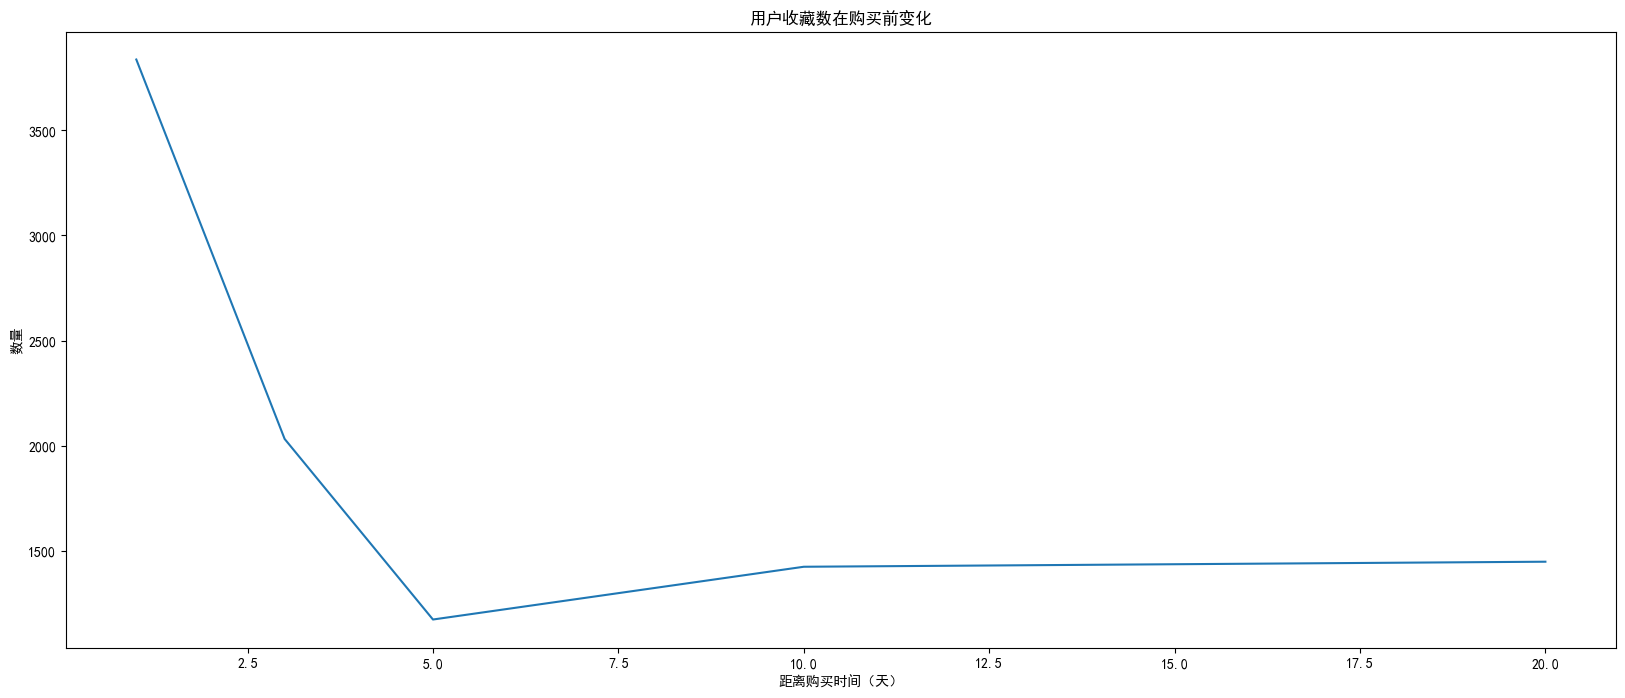

In [14]:
def minus_pre(y):
    ret_y = y[:]
    for i in range(len(y)):
        if i == 0:
            ret_y[i] = y[i]
        else:
            ret_y[i] = y[i] - y[i-1]
    return ret_y

def plot_action_before_buy():
    x = [1, 3, 5, 10, 20]
    y1 = [607437, 767137, 844882, 947327, 1036340]
    y2 = [60219, 67730, 71207, 75883, 79994]
    y3 = [6152, 7084, 7611, 8308, 8992]
    y5 = [3837, 5869, 7042, 8466, 9914]
    y6 = [974302, 1230342, 1353924, 1516460, 1652382]
    
    y1 = minus_pre(y1)
    y2 = minus_pre(y2)
    y3 = minus_pre(y3)
    y5 = minus_pre(y5)
    y6 = minus_pre(y6)
    
    print(y1)
    print(y2)
    print(y3)
    print(y5)
    print(y6)
    
    plt.plot(x, y5)
    plt.title("用户收藏数在购买前变化")
    plt.xlabel("距离购买时间（天）")
    plt.ylabel("数量")
    plt.savefig("./figs/follow_cnt_before_buy.png", dpi=600)
    plt.show()

plot_action_before_buy()